### 1. Imports

In [1]:
# these are some Jupyter-specific settings. Only really relevant when drawing charts on high-res screens.
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# imports...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Plot styling
plt.style.use('ggplot')

### 2. Load Data

We use the same data-set and method as in Excercise 1 _(Load CSV Data)_

In [2]:
df = pd.read_csv('data/train.csv')

df = df.drop(columns='Id')

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Examine the Data (correlations)

Python has some amazing plotting libraries available free of use. One of these is Seaborn _(built untop of Matplotlib)_, which is a statistical plotting tool.

Since we're doing simple regression, I'd say we'd be smart to see if we can model the saleprice of the house by the overall quality of the material and finish of the house. 

The results below clearly states that there are high positive levels of correlation between `OverallQual` our dependent variable `SalePrice`.

Thus we're interested in the following relationship:

$$\text{SalePrice}=\beta_0+\beta_1\cdot\text{OverallQual}+u$$

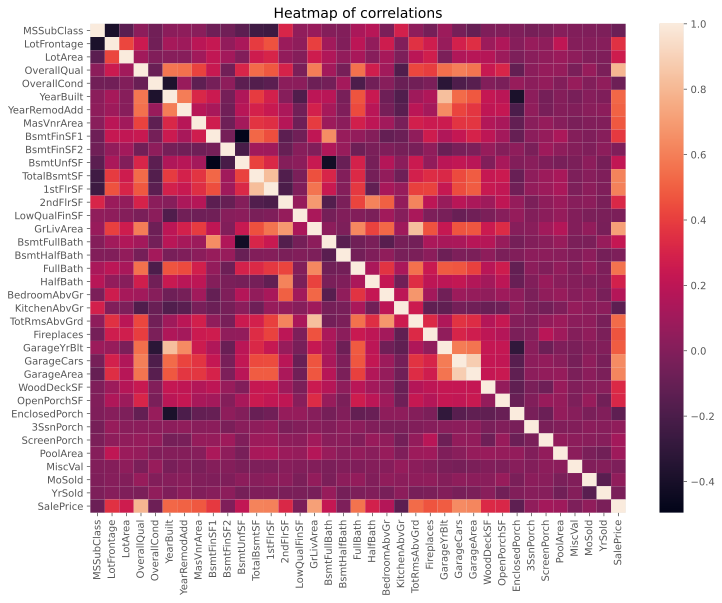

In [3]:
# Creates an empty figure to place the plot in. Only needed to have adjudsted size
plt.figure(figsize=(12,9))

# Set title of plot
plt.title('Heatmap of correlations', fontsize=14)

# Use the seaborn library to create the heatmap - passing the correlation between all variables as argument
sns.heatmap(df.corr(), annot=False, vmax=1)

# Explicitly show plot in-line (not required)
plt.show()

#### Plotting

Before we fit the model, let's look at the distributions of the given variables - again using the seaborn package.

* We find - quite as expected - that SalePrice is somewhat right-skewed and OverallQual some kind of near-normal distribution.

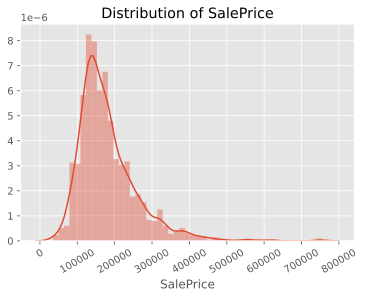

In [4]:
sns.distplot(df['SalePrice']).set_title('Distribution of SalePrice')

# rotate x labels
plt.xticks(rotation=30)

plt.show()

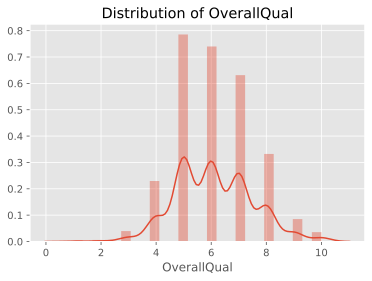

In [5]:
sns.distplot(df['OverallQual']).set_title('Distribution of OverallQual')

plt.show()

### 4. Fitting the model

Let's fit the model and see, which dependancy or significance we find.

Using the statsmodels package and it's OLS class, we can get a standard Stata-like output right in the Jupyter notebook.

In [6]:
reg = smf.ols('SalePrice ~ OverallQual', data=df).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 03 Sep 2020   Prob (F-statistic):          2.19e-313
Time:                        16:17:43   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation

We see from the regression output, that we have a reasonably high $R^2$ and that everything is quite significant. There may be some major _omitted variable bias_ though - but we'll cover this in the next output.

If we're interested in grahically illustrating this simple relationsship, we can use the `regplot` tool from the Seaborn package - we also see here, that the linear relationsship is quite strong.

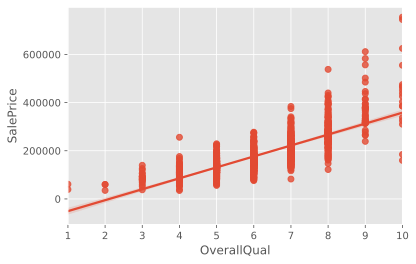

In [7]:
sns.regplot(x='OverallQual', y='SalePrice', data=df)
plt.show() 